In [12]:
import pandas as pd
import statistics


In [5]:
repos = pd.read_csv("repositories.csv")

In [23]:
repos.head()[0:10]

,id,node_id,name,full_name,private,owner,html_url,description,fork,url,...,disabled,open_issues_count,license,topics,forks,open_issues,watchers,default_branch,permissions,score
0,307429416,MDEwOlJlcG9zaXRvcnkzMDc0Mjk0MTY=,fastlogitME,M-thieu/fastlogitME,False,M-thieu,https://github.com/M-thieu/fastlogitME,Fast but Basic Marginal Effects for Logit Mode...,False,https://api.github.com/repos/M-thieu/fastlogitME,...,False,0,NaN,[],0,0,0,master,NaN,1.0
1,73220408,MDEwOlJlcG9zaXRvcnk3MzIyMDQwOA==,Seattle-Feature-Service,bricker0/Seattle-Feature-Service,False,bricker0,https://github.com/bricker0/Seattle-Feature-Se...,Here I explain how to call Seattle Open Data E...,False,https://api.github.com/repos/bricker0/Seattle-...,...,False,0,NaN,[],0,0,2,master,NaN,1.0
2,259872452,MDEwOlJlcG9zaXRvcnkyNTk4NzI0NTI=,choropleth_map,bricker0/choropleth_map,False,bricker0,https://github.com/bricker0/choropleth_map,How to make a choropleth map using SDG indicat...,False,https://api.github.com/repos/bricker0/chorople...,...,False,0,MIT License,[],0,0,1,master,NaN,1.0
3,112259672,MDEwOlJlcG9zaXRvcnkxMTIyNTk2NzI=,Live_Earthquake_Feed,bricker0/Live_Earthquake_Feed,False,bricker0,https://github.com/bricker0/Live_Earthquake_Feed,Want to make one of those snazzy live Earthqua...,False,https://api.github.com/repos/bricker0/Live_Ear...,...,False,0,NaN,[],0,0,0,master,NaN,1.0
4,51859197,MDEwOlJlcG9zaXRvcnk1MTg1OTE5Nw==,MyLocation,bricker0/MyLocation,False,bricker0,https://github.com/bricker0/MyLocation,Lab 3,False,https://api.github.com/repos/bricker0/MyLocation,...,False,0,NaN,[],0,0,0,master,NaN,1.0


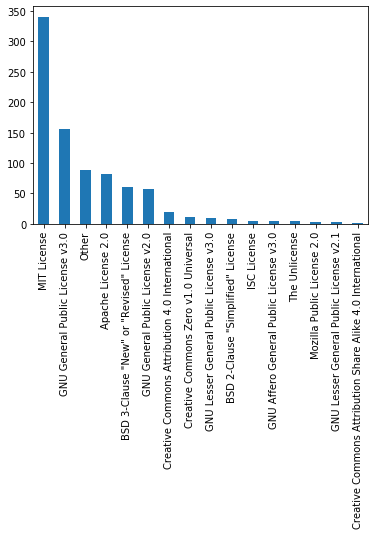

In [9]:
#licences
repos["license"].value_counts().plot(kind='bar')